# Summary of the assignments
<p> Assignment #1: Dataset: catvnoncat - Comparison of conventional ANN with Convolutional NN (CNN)</p>
<p> Assignment #2: fashion MNIST - Comparison of conventional ANN with Convolutional NN (CNN)</p>
<p> Assignment #3: cifar10 - Comparison of conventional ANN with Convolutional NN (CNN) and implementation of keras tuner </p>
<p> Assignment #4: Dataset: cifar10 - Implementation of AlexNet </p>

# Assignment #1: Dataset: catvnoncat - Comparison of conventional ANN with Convolutional NN (CNN)

# Running with the conventional ANN

In [28]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from utils import dataset_loader
import pandas as pd

# Set seed for reproducibility
seed = 1404
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

X_train_all,y_train_all,X_test,y_test = dataset_loader('./')

X_train,y_train = X_train_all[:-50],y_train_all[:-50]
X_valid,y_valid = X_train_all[-50:],y_train_all[-50:]

In [29]:
input_shape=X_train.shape[1:]
input_shape

(64, 64, 3)

In [30]:
X_train_scaled=X_train/255
X_valid_scaled=X_valid/255
X_test_scaled=X_test/255

In [35]:
model=Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [36]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [37]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_valid_scaled,y_valid))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.4751 - loss: 1.1338 - val_accuracy: 0.6800 - val_loss: 0.6998
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6225 - loss: 0.6600 - val_accuracy: 0.6400 - val_loss: 0.6687
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7077 - loss: 0.5693 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6761 - loss: 0.5638 - val_accuracy: 0.5800 - val_loss: 0.6489
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7120 - loss: 0.5811 - val_accuracy: 0.5200 - val_loss: 0.8077
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6421 - loss: 0.5964 - val_accuracy: 0.6200 - val_loss: 0.6490
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8013 - loss: 0.4922 - val_accuracy: 0.5800 - val_loss: 0.7475
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8013 - loss: 0.4564 - val_accuracy: 0.5600 - val_loss: 0.7881

<Axes: >

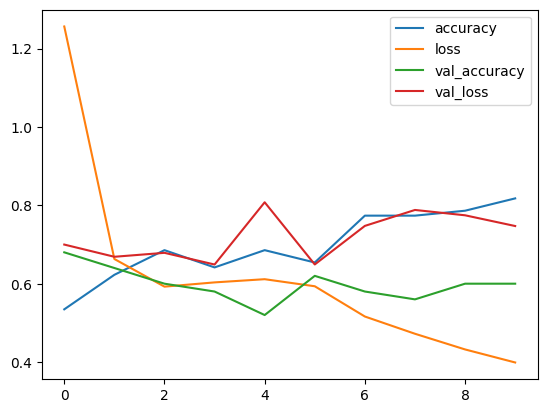

In [38]:
df=pd.DataFrame(history.history)
df.plot()

In [41]:
preds=model.predict(X_test)
y_pred=(preds>0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.82      0.61        17
           1       0.86      0.55      0.67        33

    accuracy                           0.64        50
   macro avg       0.67      0.68      0.64        50
weighted avg       0.73      0.64      0.65        50



# Running with the convolutional NN (CNN)

In [52]:
from tensorflow.keras.layers import Conv2D,MaxPool2D

model = tf.keras.Sequential([
    Input(shape=input_shape),
    Conv2D(filters=5,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')
]
)

In [56]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,epochs=8,validation_data=(X_valid_scaled,y_valid))

Epoch 1/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.8504 - loss: 0.3107 - val_accuracy: 0.7400 - val_loss: 0.6206
Epoch 2/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9252 - loss: 0.1904 - val_accuracy: 0.8000 - val_loss: 0.4770
Epoch 3/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9332 - loss: 0.2040 - val_accuracy: 0.7400 - val_loss: 0.6506
Epoch 4/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.9420 - loss: 0.1706 - val_accuracy: 0.8400 - val_loss: 0.4467
Epoch 5/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9420 - loss: 0.1576 - val_accuracy: 0.7600 - val_loss: 0.5019
Epoch 6/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9665 - loss: 0.1252 - val_accuracy: 0.7600 - val_loss: 0.5474
Epoch 7/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9764 - loss: 0.0978 - val_accuracy: 0.8400 - val_loss: 0.4501
Epoch 8/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9720 - loss: 0.0937 - val_accuracy: 0.7400 - val_loss: 0.5678


<Axes: >

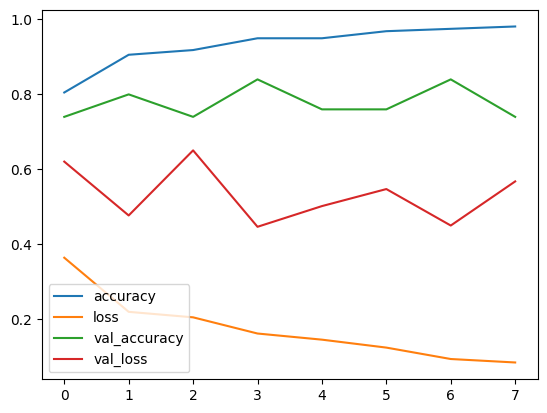

In [57]:
df=pd.DataFrame(history.history)
df.plot()

In [58]:
preds=model.predict(X_test)
y_pred=(preds>0.5).astype(int)
print(classification_report(y_test,y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        17
           1       1.00      0.39      0.57        33

    accuracy                           0.60        50
   macro avg       0.73      0.70      0.60        50
weighted avg       0.82      0.60      0.59        50



# Assignment #2: fashion MNIST - Comparison of conventional ANN with Convolutional NN (CNN)

# Running with the conventional ANN

# Running with the convolutional NN (CNN)

# Assignment #3: cifar10 - Comparison of conventional ANN with Convolutional NN (CNN) and implementation of keras tuner

# Running with the conventional ANN

# Running with the convolutional NN (CNN)

# Assignment #4: Dataset: cifar10 - Implementation of AlexNet